In [1]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install scikit-learn
!pip install scipy

import numpy as np
import sys
import pandas as pd
import scipy as sp
import tensorflow as tf
import builtins
import os
import pickle
import time
import pylab
import cv2
import keras
import sys
import csv
from matplotlib import pyplot as plt
from sklearn import preprocessing

D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programms\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

In [2]:
#Считываем датасет

phones = pd.read_csv("train.csv")
#flats.head()
phones.columns
#flats.describe(include = "all")
#print(flats)
#phones.price_range

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
#Вносим изменения в датасет

def core(x,i):#функция, которая определяет новый признак
    if(x == i):
        return 1
    else:
        return 0

core_1 = phones.apply(lambda x: core(x.n_cores,1), axis = 1)
phones['core_1'] = core_1.array#добавляю новый признак в датасет
#flats.columns
#flats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E399D9608>,
      dtype=object)

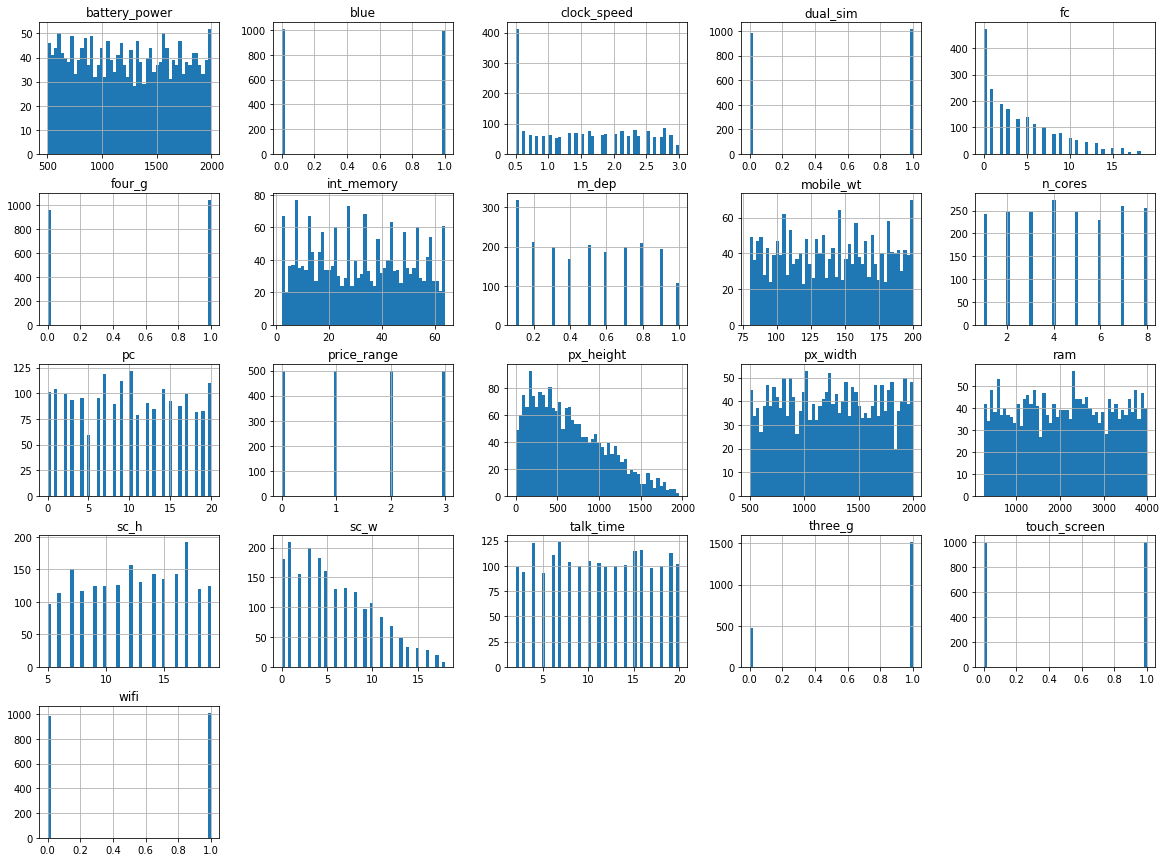

In [3]:
#Анализируем датасет
%matplotlib inline
phones.hist(bins=50,figsize=(20,15))

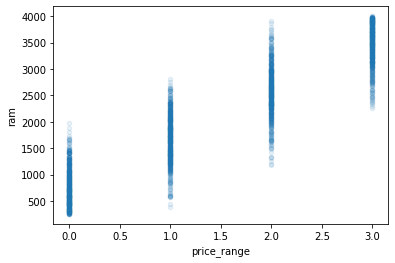

In [4]:
#Продолжаем анализировать датасет

phones.plot(kind = "scatter", x = "price_range", y = "ram", alpha = 0.1)#price_range(ram), ram(fc)
#выголядит интригующе

In [5]:
#Корреляция 1
corr = phones.corr()
print(corr["price_range"].sort_values(ascending = False))#видно, что price_range и ram сильно зависят друг от друга
#

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [6]:
#Корреляция 2
phones["total_speed"] = phones["n_cores"]*phones["clock_speed"] 
corr = phones.corr()
print(corr["price_range"].sort_values(ascending = False))

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
total_speed     -0.008290
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [14]:
#Нормализация признаков
x = phones[["ram"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n = pd.DataFrame(x_norm)
phones_n['ram'] = pd.DataFrame(x_norm)

x = phones[["battery_power"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n['battery_power'] = pd.DataFrame(x_norm)

x = phones[["px_width"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n['px_width'] = pd.DataFrame(x_norm)

x = phones[["px_height"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n['px_height'] = pd.DataFrame(x_norm)

x = phones[["int_mem"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n['int_mem'] = pd.DataFrame(x_norm)

x = phones[["pc"]].values.astype(float)
min_max = preprocessing.MinMaxScaler()
x_norm = min_max.fit_transform(x)
phones_n['pc'] = pd.DataFrame(x_norm)

phones_n['price_range'] = phones['price_range']
del phones_n[0]

print(phones_n)

           ram  battery_power  px_width  px_height  price_range
0     0.612774       0.227789  0.170895   0.010204            1
1     0.634687       0.347361  0.993324   0.461735            2
2     0.627205       0.041416  0.811749   0.644388            2
3     0.671566       0.076152  0.858478   0.620408            2
4     0.308658       0.881764  0.475300   0.616327            1
...        ...            ...       ...        ...          ...
1995  0.110102       0.195725  0.927904   0.623469            0
1996  0.474613       0.977956  0.977971   0.466837            2
1997  0.748530       0.941884  0.755674   0.442857            3
1998  0.163816       0.675351  0.113485   0.171429            0
1999  0.978888       0.006012  0.169559   0.246429            3

[2000 rows x 5 columns]


In [15]:
#Корреляция 3
corr = phones_n.corr()
print(corr["price_range"].sort_values(ascending = False))#видно, что price_range и ram сильно зависят друг от друга

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
Name: price_range, dtype: float64
